## DAS reconstrction evaluation on one file 
### loading libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics.pairwise import cosine_similarity as  cs ,manhattan_distances as L1,euclidean_distances as L2
params = {'legend.fontsize': 16,
          'legend.handlelength': 1,
         'font.size': 16}
plt.rcParams.update(params)
from scipy import signal
import h5py
numsimp=int(30000/100)
lowpass_filter = signal.butter(1,Wn=0.001,btype='low',output='sos')

## writing functions for drawing and scoring 

In [3]:
def draw_das_signale(daspredict,dasfact,mode='original',steps=50,fs=5):
    #mode='original' or 'filter'
    chanels=list(range(0, len(daspredict[0]),steps))
    fig, axes = plt.subplots(len(list(range(0, len(daspredict[0]),steps))),figsize=(20,15))
    for i in range(len(list(range(0, len(daspredict[0]),steps)))):
        if mode=='original':
            axes[i].plot(daspredict[:,chanels[i]],label="predict")
            axes[i].plot(dasfact[:,chanels[i]],label="fact")
        else:
            axes[i].plot(signal.resample(signal.sosfilt(lowpass_filter, daspredict[:,chanels[i]]),numsimp),label="predict")
            axes[i].plot(signal.resample(signal.sosfilt(lowpass_filter, dasfact[:,chanels[i]]),numsimp),label="fact")
        axes[i].legend(loc="upper left")
        handles, labels = axes[i].get_legend_handles_labels()
        handles.append(mpatches.Patch(color='none', label='chanel='+str(chanels[i])))
        axes[i].legend(loc="upper left",handles=handles)
        fct=dasfact[:,chanels[i]].reshape(1, -1)
        prd=daspredict[:,chanels[i]].reshape(1, -1)
        text='L1='+str(1-(L1(fct,prd)[0][0])/len(prd[0]))[:fs]+'; L2='+str(1-(L2(fct,prd)[0][0])/len(prd[0]))[:fs]+'; Cosin='+str(1-abs(cs(fct,prd)[0][0]))[:fs]
        text='L1='+str(1-(L1(fct,prd)[0][0])/len(prd[0]))[:fs]+'\nL2='+str(1-(L2(fct,prd)[0][0])/len(prd[0]))[:fs]+'\nCosin='+str(1-abs(cs(fct,prd)[0][0]))[:fs]
        axes[i].text(1,0.1,text,transform=axes[i].transAxes, bbox=dict(facecolor='none',edgecolor='black',boxstyle='square')) 
        str(1-(L1(fct,prd)[0][0]/len(prd[0])))
    return plt


In [4]:
def scorer(dasfact,daspredict):
    cosins=[]
    L1s=[]
    L2s=[]
    for i in range(len(daspredict[0])):
        fct=dasfact[:,i].reshape(1, -1)
        prd=daspredict[:,i].reshape(1, -1)
        L1s.append(1-(L1(fct,prd)[0][0]/len(prd[0])))
        L2s.append(1-(L2(fct,prd)[0][0]/len(prd[0])))
        cosins.append(1-abs(cs(fct,prd)[0][0]))
    return {'L1':np.mean(L1s),'L2':np.mean(L2s),'cosine similarity':np.mean(cosins)}

## testing with one generated file

In [5]:
fact=h5py.File('/home/osman/test/PoroTomo_iDAS025_160318130147.h5', 'r') 
predict=h5py.File('/home/osman/aramko/outputs/das/h5_files/160318130147.h', 'r') 
daspredict = np.array(predict['das'])
dasfact = np.array(fact['das'])
scorer(dasfact,daspredict)

{'L1': 0.9853728838870929,
 'L2': 0.9998897738423302,
 'cosine similarity': 0.9540711678777901}

## drawing original raw signals 

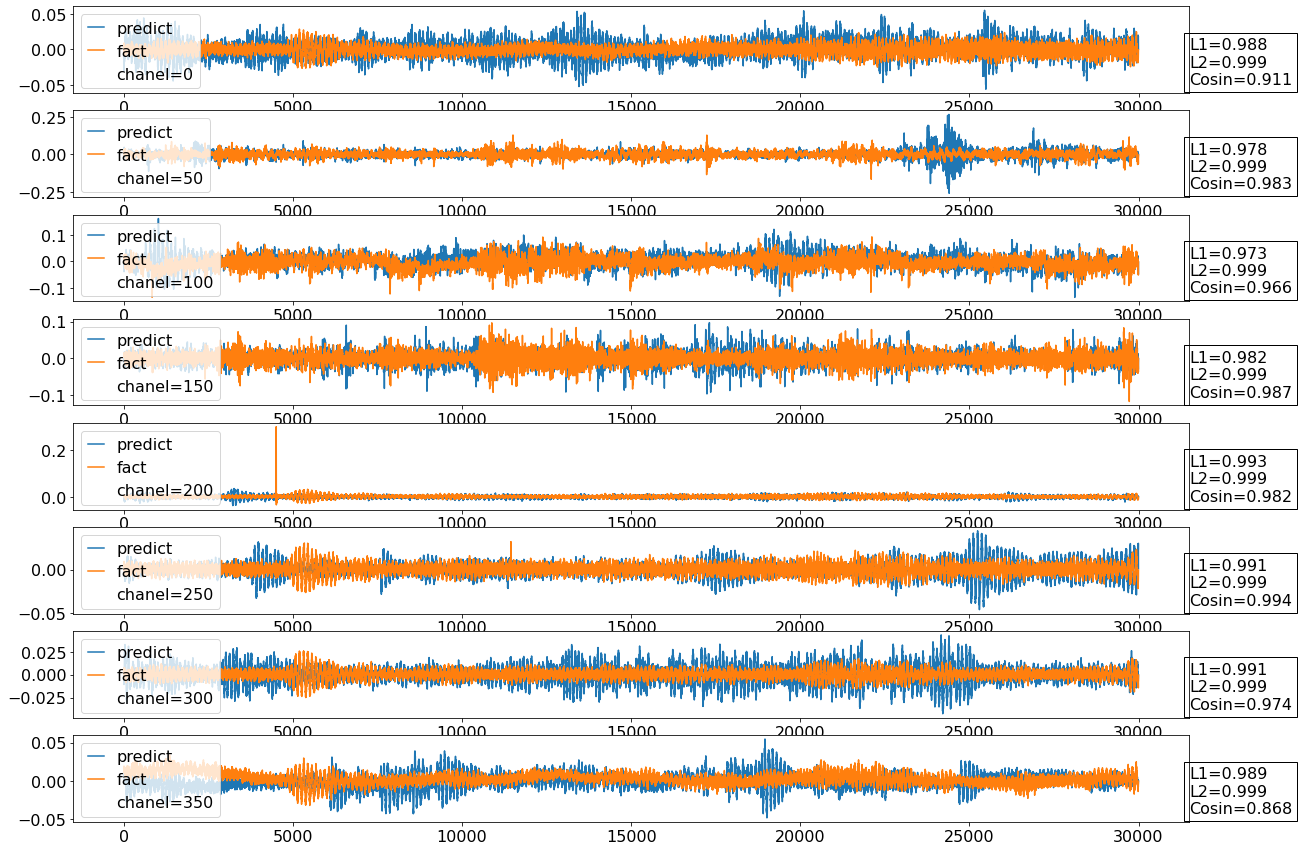

In [6]:
draw_das_signale(daspredict,dasfact).show()

## drawing filtred signals 

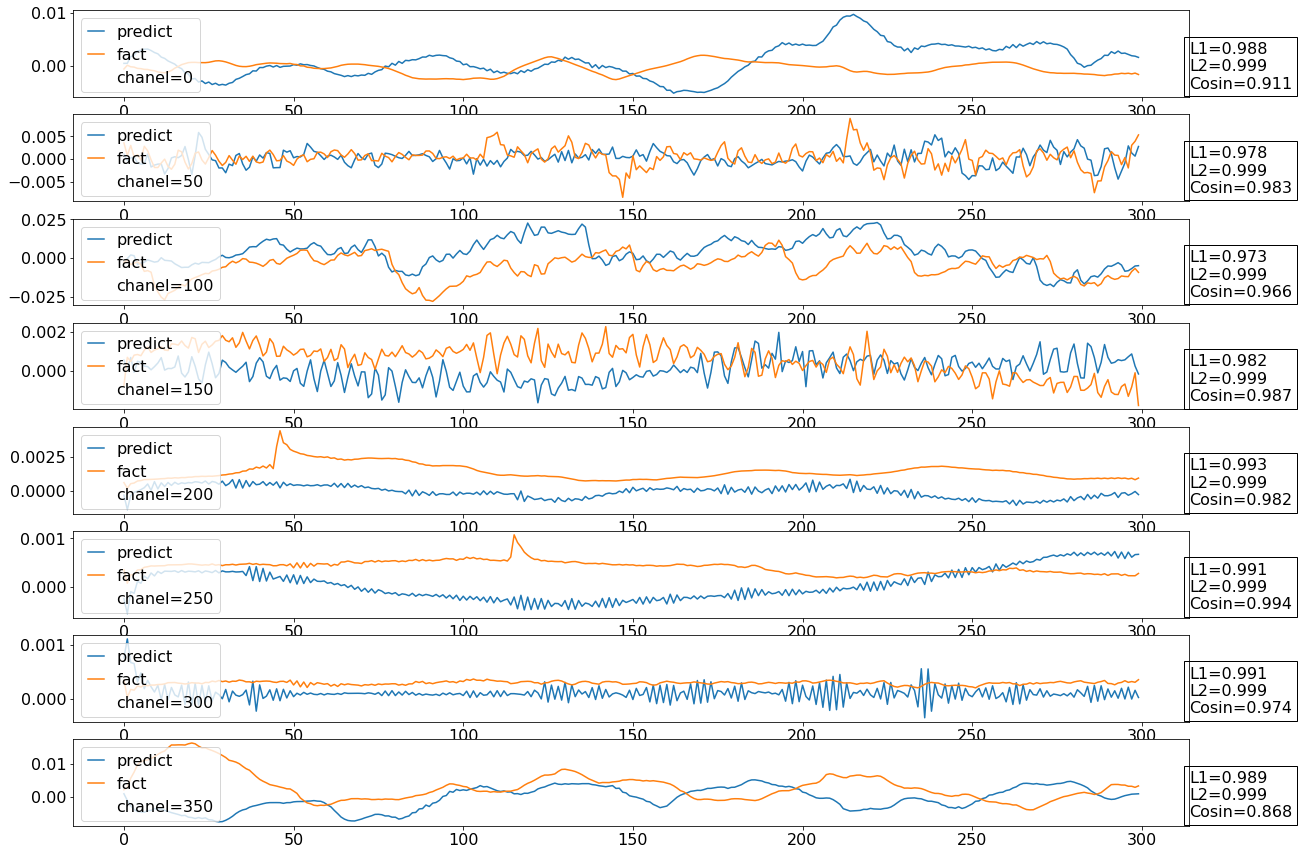

In [7]:
draw_das_signale(daspredict,dasfact,mode='filter').show()